In [1]:
import pandas as pd
import numpy as np
from collections import Counter as c
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import pickle

In [2]:
data=pd.read_csv("/content/kidney_disease.csv")
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [4]:
data.columns=['id','age','blood_pressure','specific_gravity','albumin','sugar','red_blood_cells','pus_cell','pus_cell_clumps','bacteria','blood glucose random','blood_urea','serum_creatinine','sodium','potassium','hemoglobin','packed_cell_volume','white_blood_cell_count','red_blood_cell_count','hypertension','diabetesmellitus','coronary_artery_disease','appetite','pedal_edema','anemia','class']
data.columns

Index(['id', 'age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood glucose random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetesmellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')

In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood glucose random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [6]:
data.isnull().any()

id                         False
age                         True
blood_pressure              True
specific_gravity            True
albumin                     True
sugar                       True
red_blood_cells             True
pus_cell                    True
pus_cell_clumps             True
bacteria                    True
blood glucose random        True
blood_urea                  True
serum_creatinine            True
sodium                      True
potassium                   True
hemoglobin                  True
packed_cell_volume          True
white_blood_cell_count      True
red_blood_cell_count        True
hypertension                True
diabetesmellitus            True
coronary_artery_disease     True
appetite                    True
pedal_edema                 True
anemia                      True
class                      False
dtype: bool

In [7]:
data['blood glucose random'].fillna(data['blood glucose random'].mode()[0],inplace=True)
data['blood_pressure'].fillna(data['blood_pressure'].mean(),inplace=True)
data['blood_urea'].fillna(data['blood_urea'].mean(),inplace=True)
data['hemoglobin'].fillna(data['hemoglobin'].mean(),inplace=True)
data['potassium'].fillna(data['potassium'].mean(),inplace=True)
data['packed_cell_volume'].fillna(data['packed_cell_volume'].mode()[0],inplace=True)
data['red_blood_cell_count'].fillna(data['red_blood_cell_count'].mode()[0],inplace=True)
data['serum_creatinine'].fillna(data['serum_creatinine'].mean(),inplace=True)
data['sodium'].fillna(data['sodium'].mean(),inplace=True)
data['white_blood_cell_count'].fillna(data['white_blood_cell_count'].mode()[0],inplace=True)
data['age'].fillna(data['age'].mean(),inplace=True)
data['hypertension'].fillna(data['hypertension'].mode()[0],inplace=True)
data['pus_cell_clumps'].fillna(data['pus_cell_clumps'].mode()[0],inplace=True)
data['appetite'].fillna(data['appetite'].mode()[0],inplace=True)
data['albumin'].fillna(data['albumin'].mean(),inplace=True)
data['pus_cell'].fillna(data['pus_cell'].mode()[0],inplace=True)
data['red_blood_cells'].fillna(data['red_blood_cells'].mode()[0],inplace=True)
data['coronary_artery_disease'].fillna(data['coronary_artery_disease'].mode()[0],inplace=True)
data['bacteria'].fillna(data['bacteria'].mode()[0],inplace=True)
data['anemia'].fillna(data['anemia'].mode()[0],inplace=True)
data['sugar'].fillna(data['sugar'].mean(),inplace=True)
data['diabetesmellitus'].fillna(data['diabetesmellitus'].mode()[0],inplace=True)
data['pedal_edema'].fillna(data['pedal_edema'].mode()[0],inplace=True)
data['specific_gravity'].fillna(data['specific_gravity'].mean(),inplace=True)

In [8]:
catcols=set(data.dtypes[data.dtypes=='O'].index.values)
print(catcols)

{'packed_cell_volume', 'pus_cell', 'red_blood_cells', 'pedal_edema', 'anemia', 'coronary_artery_disease', 'diabetesmellitus', 'class', 'pus_cell_clumps', 'appetite', 'bacteria', 'white_blood_cell_count', 'hypertension', 'red_blood_cell_count'}


In [9]:
for i in catcols:
  print("columns :",i)
  print(c(data[i]))
  print('*'*120+'\n')

columns : packed_cell_volume
Counter({'41': 91, '52': 21, '44': 19, '48': 19, '40': 16, '43': 14, '45': 13, '42': 13, '32': 12, '36': 12, '33': 12, '28': 12, '50': 12, '37': 11, '34': 11, '35': 9, '29': 9, '30': 9, '46': 9, '31': 8, '39': 7, '24': 7, '26': 6, '38': 5, '47': 4, '49': 4, '53': 4, '51': 4, '54': 4, '27': 3, '22': 3, '25': 3, '23': 2, '19': 2, '16': 1, '\t?': 1, '14': 1, '18': 1, '17': 1, '15': 1, '21': 1, '20': 1, '\t43': 1, '9': 1})
************************************************************************************************************************

columns : pus_cell
Counter({'normal': 324, 'abnormal': 76})
************************************************************************************************************************

columns : red_blood_cells
Counter({'normal': 353, 'abnormal': 47})
************************************************************************************************************************

columns : pedal_edema
Counter({'no': 324, 'yes': 76})
*

In [10]:
catcols.remove('red_blood_cell_count')
catcols.remove('packed_cell_volume')
catcols.remove('white_blood_cell_count')
print(catcols)

{'pus_cell', 'red_blood_cells', 'pedal_edema', 'anemia', 'coronary_artery_disease', 'diabetesmellitus', 'class', 'pus_cell_clumps', 'appetite', 'bacteria', 'hypertension'}


In [11]:
catcols={'anemia','pedal_edema','appetite','bacteria','class','coronary_artery_disease','diabetesmellitus','hypertension','pus_cell','pus_cell_clumps','red_blood_cells'}

In [12]:
from sklearn.preprocessing import LabelEncoder
for i in catcols:
  print("LABEL ENCODING OF:",i)
  LEi = LabelEncoder()
  print(c(data[i]))
  data[i] = LEi.fit_transform(data[i])
  print(c(data[i]))
  print("*"*100)

LABEL ENCODING OF: pedal_edema
Counter({'no': 324, 'yes': 76})
Counter({0: 324, 1: 76})
****************************************************************************************************
LABEL ENCODING OF: pus_cell
Counter({'normal': 324, 'abnormal': 76})
Counter({1: 324, 0: 76})
****************************************************************************************************
LABEL ENCODING OF: red_blood_cells
Counter({'normal': 353, 'abnormal': 47})
Counter({1: 353, 0: 47})
****************************************************************************************************
LABEL ENCODING OF: anemia
Counter({'no': 340, 'yes': 60})
Counter({0: 340, 1: 60})
****************************************************************************************************
LABEL ENCODING OF: coronary_artery_disease
Counter({'no': 364, 'yes': 34, '\tno': 2})
Counter({1: 364, 2: 34, 0: 2})
****************************************************************************************************
LABEL ENCODI

In [13]:
contcols=set(data.dtypes[data.dtypes!='O'].index.values)
print(contcols)

{'red_blood_cells', 'hemoglobin', 'sugar', 'specific_gravity', 'albumin', 'blood_urea', 'potassium', 'blood glucose random', 'bacteria', 'sodium', 'pedal_edema', 'pus_cell', 'blood_pressure', 'pus_cell_clumps', 'age', 'hypertension', 'serum_creatinine', 'anemia', 'coronary_artery_disease', 'diabetesmellitus', 'class', 'appetite', 'id'}


In [14]:
for i in contcols:
  print("Continous Columns :",i)
  print(c(data[i]))
  print('*'*120+'\n')

Continous Columns : red_blood_cells
Counter({1: 353, 0: 47})
************************************************************************************************************************

Continous Columns : hemoglobin
Counter({12.526436781609195: 52, 15.0: 16, 10.9: 8, 9.8: 7, 11.1: 7, 13.0: 7, 13.6: 7, 11.3: 6, 10.3: 6, 12.0: 6, 13.9: 6, 15.4: 5, 11.2: 5, 10.8: 5, 9.7: 5, 12.6: 5, 7.9: 5, 10.0: 5, 14.0: 5, 14.3: 5, 14.8: 5, 12.2: 4, 12.4: 4, 12.5: 4, 15.2: 4, 9.1: 4, 11.9: 4, 13.5: 4, 16.1: 4, 14.1: 4, 13.2: 4, 13.8: 4, 13.7: 4, 13.4: 4, 17.0: 4, 15.5: 4, 15.8: 4, 9.6: 3, 11.6: 3, 9.5: 3, 9.4: 3, 12.7: 3, 9.9: 3, 10.1: 3, 8.6: 3, 11.0: 3, 15.6: 3, 8.1: 3, 8.3: 3, 10.4: 3, 11.8: 3, 11.4: 3, 11.5: 3, 15.9: 3, 14.5: 3, 16.2: 3, 14.4: 3, 14.2: 3, 16.3: 3, 16.5: 3, 15.7: 3, 16.4: 3, 14.9: 3, 15.3: 3, 17.8: 3, 12.1: 2, 9.3: 2, 10.2: 2, 10.5: 2, 6.0: 2, 11.7: 2, 8.0: 2, 12.3: 2, 8.7: 2, 13.1: 2, 8.8: 2, 13.3: 2, 14.6: 2, 16.9: 2, 16.0: 2, 14.7: 2, 16.6: 2, 16.7: 2, 16.8: 2, 15.1: 2, 17.1: 2, 17.

In [15]:
contcols.remove('specific_gravity')
contcols.remove('albumin')
contcols.remove('sugar')
print(contcols)

{'red_blood_cells', 'hemoglobin', 'blood_urea', 'potassium', 'blood glucose random', 'bacteria', 'sodium', 'pedal_edema', 'pus_cell', 'blood_pressure', 'pus_cell_clumps', 'age', 'hypertension', 'serum_creatinine', 'anemia', 'coronary_artery_disease', 'diabetesmellitus', 'class', 'appetite', 'id'}


In [16]:
contcols.add('red_blood_cell_count')
contcols.add('packed_cell_volume')
contcols.add('white_blood_cell_count')
print(contcols)

{'red_blood_cells', 'hemoglobin', 'blood_urea', 'potassium', 'blood glucose random', 'bacteria', 'sodium', 'pedal_edema', 'pus_cell', 'packed_cell_volume', 'blood_pressure', 'pus_cell_clumps', 'age', 'hypertension', 'serum_creatinine', 'anemia', 'coronary_artery_disease', 'diabetesmellitus', 'class', 'appetite', 'id', 'white_blood_cell_count', 'red_blood_cell_count'}


In [17]:
catcols.add('specific_gravity')
catcols.add('albumin')
catcols.add('sugar')
print(catcols)

{'pedal_edema', 'pus_cell', 'red_blood_cells', 'anemia', 'coronary_artery_disease', 'diabetesmellitus', 'class', 'pus_cell_clumps', 'appetite', 'specific_gravity', 'bacteria', 'sugar', 'hypertension', 'albumin'}


In [18]:
data['coronary_artery_disease'] = data.coronary_artery_disease.replace('\tno','no')
c(data['coronary_artery_disease'])

Counter({1: 364, 2: 34, 0: 2})

In [19]:
data['diabetesmellitus'] = data.diabetesmellitus.replace('\tno','no')
c(data['diabetesmellitus'])

Counter({4: 134, 3: 260, 2: 1, 0: 3, 1: 2})

#Task3

In [20]:
data.describe()

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,sodium,potassium,hemoglobin,hypertension,diabetesmellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,0.882500,0.810000,0.105000,0.055000,...,137.528754,4.627244,12.526437,0.367500,3.300000,1.080000,0.205000,0.190000,0.150000,0.755000
std,115.614301,16.974966,13.476298,0.005369,1.272318,1.029487,0.322418,0.392792,0.306937,0.228266,...,9.204273,2.819783,2.716171,0.482728,0.579517,0.289499,0.404207,0.392792,0.357519,0.968152
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.500000,2.500000,3.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.750000,42.000000,70.000000,1.015000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,135.000000,4.000000,10.875000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,199.500000,54.000000,78.234536,1.017408,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,137.528754,4.627244,12.526437,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,299.250000,64.000000,80.000000,1.020000,2.000000,0.450142,1.000000,1.000000,0.000000,0.000000,...,141.000000,4.800000,14.625000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,2.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,...,163.000000,47.000000,17.800000,1.000000,4.000000,2.000000,1.000000,1.000000,1.000000,2.000000


<ipython-input-21-868c85374ad7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.age)


<Axes: xlabel='age', ylabel='Density'>

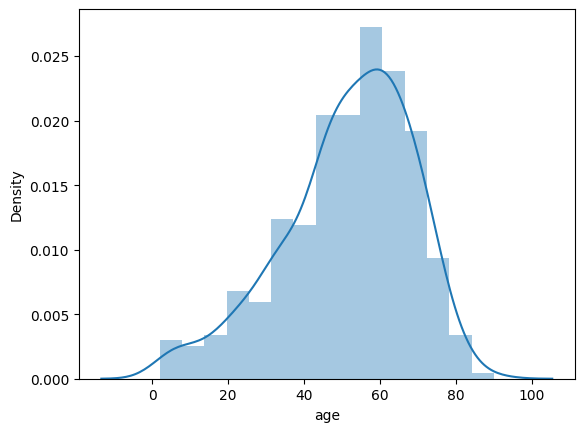

In [21]:
sns.distplot(data.age)

Text(0.5, 1.0, 'age VS blood scatter plot')

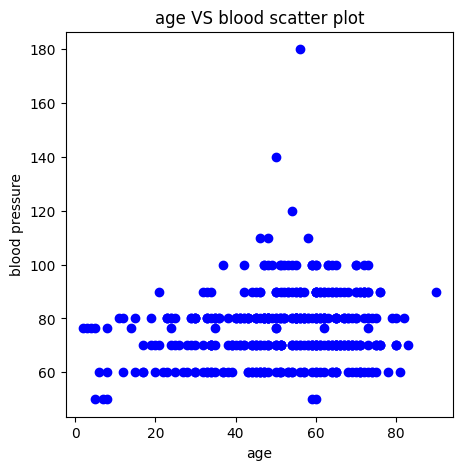

In [22]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(5,5))
plt.scatter(data['age'],data['blood_pressure'],color='blue')
plt.xlabel('age')
plt.ylabel('blood pressure')
plt.title("age VS blood scatter plot")


/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


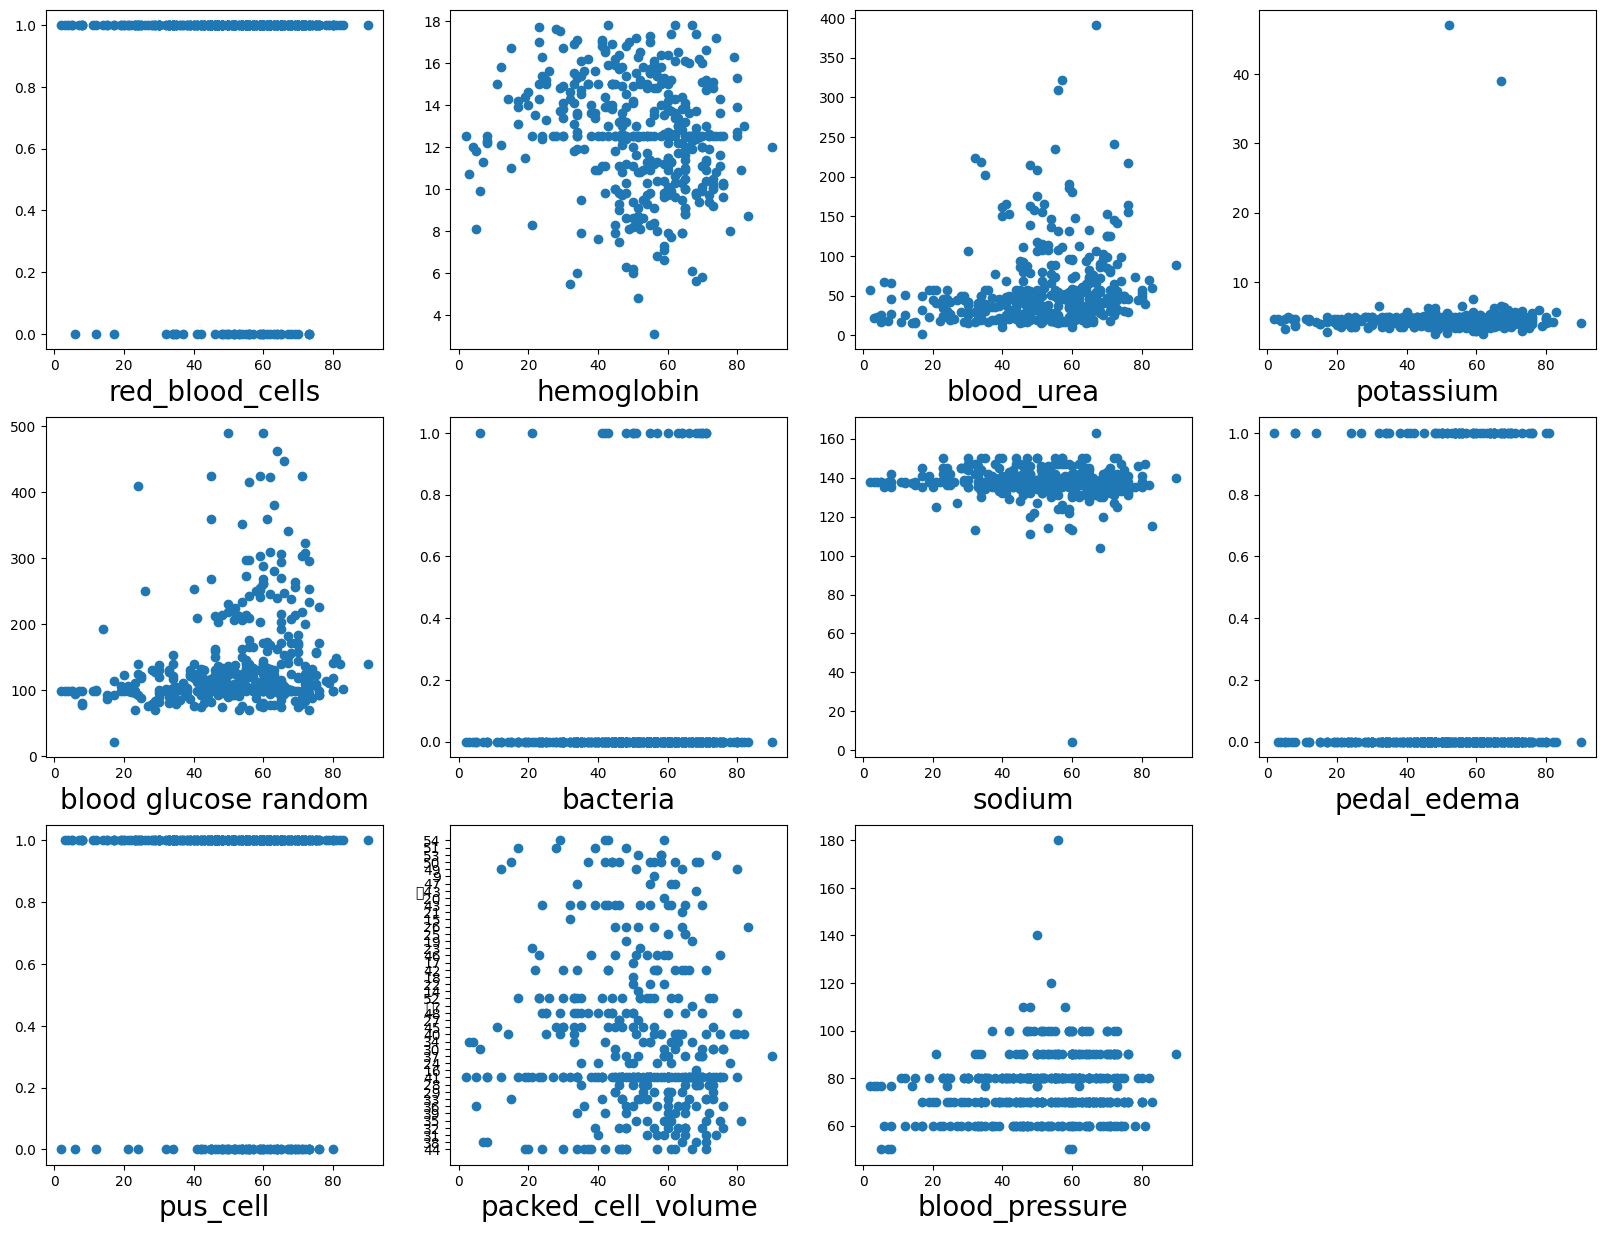

In [23]:
plt.figure(figsize=(20,15), facecolor='white')
plotnumber = 1

for column in contcols:
  if plotnumber<=11:
    ax = plt.subplot(3,4,plotnumber)
    plt.scatter(data['age'],data[column])
    plt.xlabel(column,fontsize=20)
  plotnumber+=1
plt.show()


<ipython-input-24-e8d9004f5c7e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange")


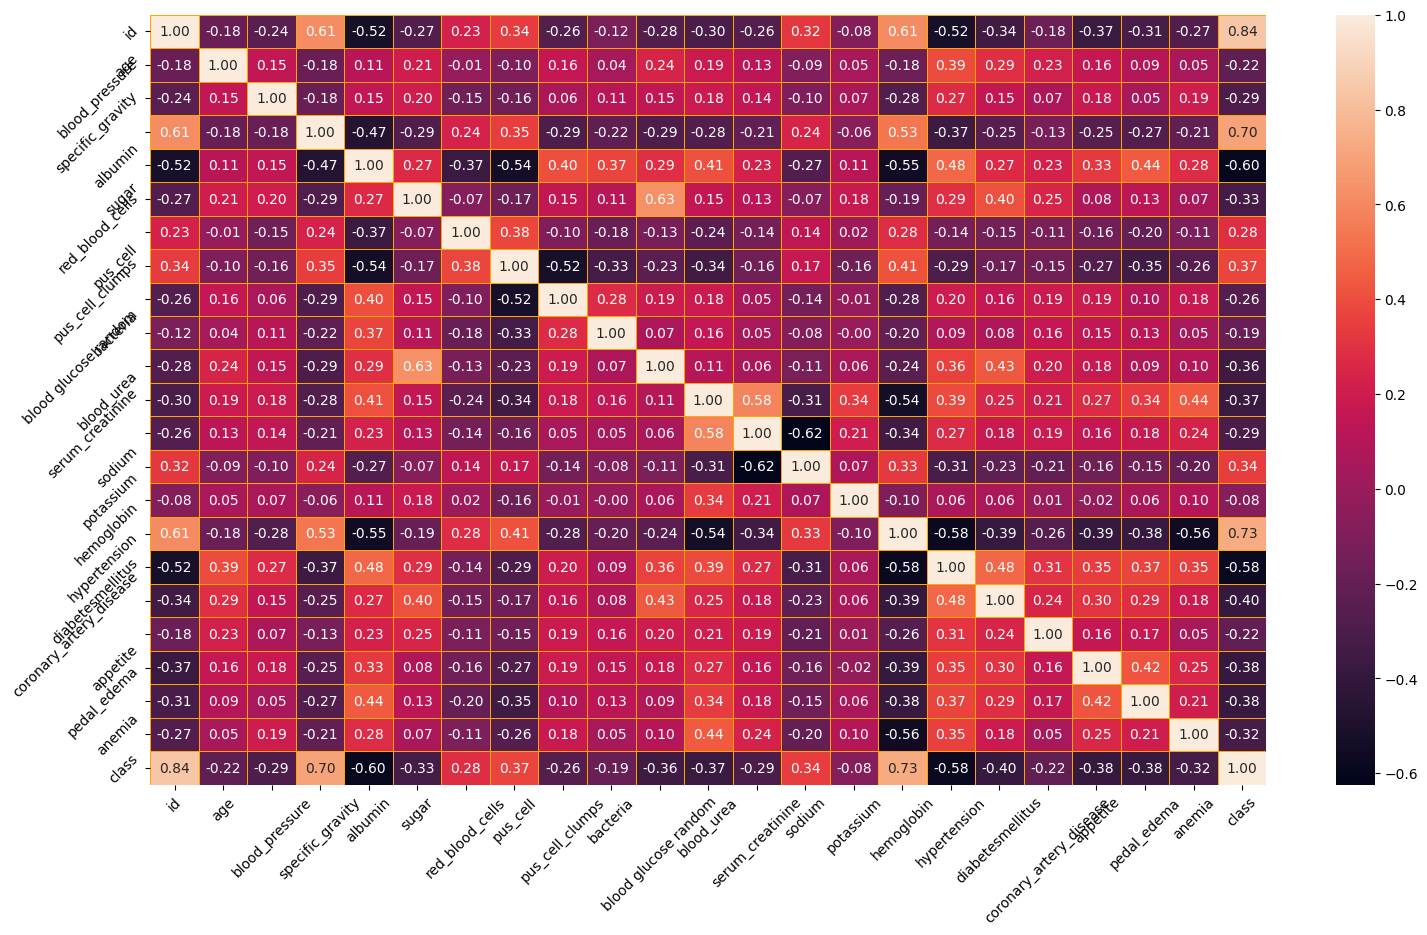

In [24]:
f,ax=plt.subplots(figsize=(18,10))
sns.heatmap(data.corr(),annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

<Axes: ylabel='count'>

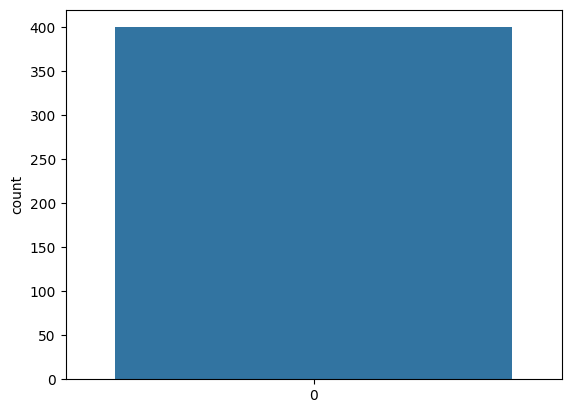

In [25]:
sns.countplot(data['class'])

In [28]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_bal=sc.fit_transform(x)

In [27]:
selcols=['red_blood_cells','pus_cell','blood glucose random','blood_urea','pedal_edema','anemia','diabetesmellitus','coronary_artery_disease']
x=pd.DataFrame(data,columns=selcols)
y=pd.DataFrame(data,columns=['class'])
print(x.shape)
print(y.shape)

(400, 8)
(400, 1)


In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

#Task4

In [30]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [31]:
classification = Sequential()
classification.add(Dense(30,activation='relu'))
classification.add(Dense(128,activation='relu'))
classification.add(Dense(64,activation='relu'))
classification.add(Dense(32,activation='relu'))
classification.add(Dense(1,activation='sigmoid'))


In [32]:
classification.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [33]:
classification.fit(x_train,y_train,batch_size=10,validation_split=0.2,epochs=100)

Epoch 1/100
26/26 [==============================] - 2s 12ms/step - loss: 1.6568 - accuracy: 0.2500 - val_loss: 0.4702 - val_accuracy: 0.1875
Epoch 2/100
26/26 [==============================] - 0s 3ms/step - loss: 0.5778 - accuracy: 0.2070 - val_loss: 0.6631 - val_accuracy: 0.5938
Epoch 3/100
26/26 [==============================] - 0s 4ms/step - loss: 0.5615 - accuracy: 0.2266 - val_loss: 0.8264 - val_accuracy: 0.1875
Epoch 4/100
26/26 [==============================] - 0s 4ms/step - loss: 1.1590 - accuracy: 0.2617 - val_loss: 1.4299 - val_accuracy: 0.1875
Epoch 5/100
26/26 [==============================] - 0s 4ms/step - loss: 1.1873 - accuracy: 0.2344 - val_loss: 0.3505 - val_accuracy: 0.3438
Epoch 6/100
26/26 [==============================] - 0s 4ms/step - loss: 0.6100 - accuracy: 0.2852 - val_loss: 0.4511 - val_accuracy: 0.3906
Epoch 7/100
26/26 [==============================] - 0s 4ms/step - loss: 0.4417 - accuracy: 0.2773 - val_loss: 0.6917 - val_accuracy: 0.1875
Epoch 8/100


In [34]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [35]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10,criterion='entropy')

In [36]:
rfc.fit(x_train,y_train)

<ipython-input-36-b87bb2ba9825>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10)

In [37]:
y_predict = rfc.predict(x_test)

In [38]:
y_predict_train = rfc.predict(x_train)

In [39]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=4,splitter='best',criterion='entropy')

In [40]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [41]:
y_predict = dtc.predict(x_test)
y_predict

array([0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2,
       0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0,
       0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2])

In [42]:
y_predict_train = dtc.predict(x_train)

In [43]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
from sklearn.metrics import accuracy_score,classification_report
y_predict = lgr.predict(x_test)

In [45]:
y_pred = lgr.predict([[1,1,121.000000,36.0,0,0,1,0]])
print(y_pred)
(y_pred)

[2]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([2])

In [46]:
y_pred = dtc.predict([[1,1,121.000000,36.0,0,0,1,0]])
print(y_pred)
(y_pred)

[2]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([2])

In [47]:
y_pred = rfc.predict([[1,1,121.000000,36.0,0,0,1,0]])

print(y_pred)
(y_pred)

[2]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([2])

In [48]:
classification.save("ckd.h5")

In [49]:
y_pred = classification.predict(x_test)

3/3 [==============================] - 0s 4ms/step


In [50]:
y_pred

array([[1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],

In [51]:
y_pred = (y_pred > 0.5)
y_pred

array([[ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [

In [52]:
def predict_exit(sample_value):
  sample_value = np.array(sample_value)
  sample_value = sample_value.reshape(1,-1)
  sample_value = sc.transform(sample_value)
  return classifier.predict(sample_value)

In [53]:
test=classification.predict([[1,1,121.000000,36.0,0,0,1,0]])
if test==1:
     print('prediction: High chance of CKD!')
else:
    print('prediction: Low chance of CKD.')

1/1 [==============================] - 0s 92ms/step
prediction: High chance of CKD!


#Task5

In [54]:
from sklearn import model_selection

In [55]:
dfs = []
models = [
          ('LogReg', LogisticRegression()),
          ('RF', RandomForestClassifier()),
          ('DecisionTree', DecisionTreeClassifier()),
         ]
results = []
names = []
scoring = ['accuracy','precision_weighted','recall_weighted','f1_weighted','roc_auc']
target_names = ['NO CKD','CKD','CKD']
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
    cv_results = model_selection.cross_validate(model, x_train, y_train, cv=kfold, scoring=scoring)
    clf = model.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(name)
    print(classification_report(y_test, y_pred, target_names=target_names))
    results.append(cv_results)
    names.append(names)
    this_df = pd.DataFrame(cv_results)
    this_df['model'] = name
dfs.append(this_df)
final = pd.concat(dfs, ignore_index=True)
print(final)             

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent cal

LogReg
              precision    recall  f1-score   support

      NO CKD       0.98      0.92      0.95        53
         CKD       0.00      0.00      0.00         1
         CKD       0.87      1.00      0.93        26

    accuracy                           0.94        80
   macro avg       0.62      0.64      0.63        80
weighted avg       0.93      0.94      0.93        80



/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 76, in _cached_call
    return cache[method]
KeyError: 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 373, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 78, in _cached_call
    result = getattr(estimator, method)(*args, **kwargs)
AttributeError: 'RandomForestClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  

RF
              precision    recall  f1-score   support

      NO CKD       0.96      0.96      0.96        53
         CKD       0.00      0.00      0.00         1
         CKD       0.93      0.96      0.94        26

    accuracy                           0.95        80
   macro avg       0.63      0.64      0.64        80
weighted avg       0.94      0.95      0.94        80

DecisionTree
              precision    recall  f1-score   support

      NO CKD       0.94      0.96      0.95        53
         CKD       0.00      0.00      0.00         1
         CKD       0.92      0.92      0.92        26

    accuracy                           0.94        80
   macro avg       0.62      0.63      0.63        80
weighted avg       0.93      0.94      0.93        80

   fit_time  score_time  test_accuracy  test_precision_weighted  \
0  0.004632    0.029240       0.906250                 0.908578   
1  0.004352    0.022734       0.890625                 0.876603   
2  0.004089    0.0256

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 76, in _cached_call
    return cache[method]
KeyError: 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 373, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 78, in _cached_call
    result = getattr(estimator, method)(*args, **kwargs)
AttributeError: 'DecisionTreeClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  

In [56]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predict)
cm

array([[49,  0,  4],
       [ 1,  0,  0],
       [ 0,  0, 26]])

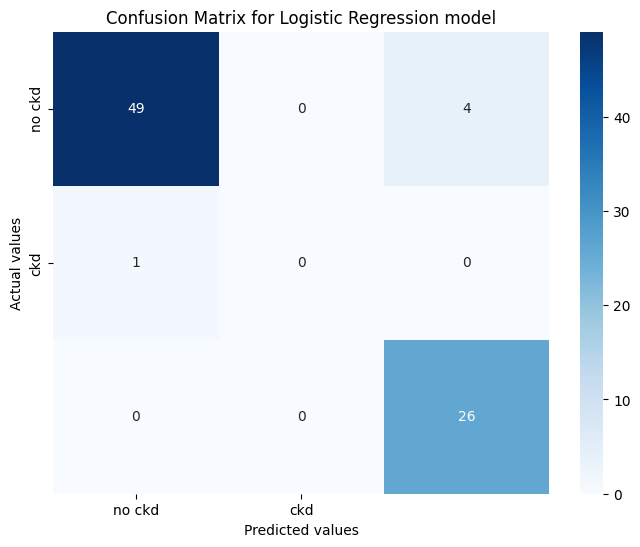

In [57]:
plt.figure(figsize=(8,6))
sns.heatmap(cm,cmap='Blues',annot=True, xticklabels=['no ckd','ckd'],yticklabels=['no ckd','ckd'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Logistic Regression model')
plt.show()

In [58]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm

array([[49,  0,  4],
       [ 1,  0,  0],
       [ 0,  0, 26]])

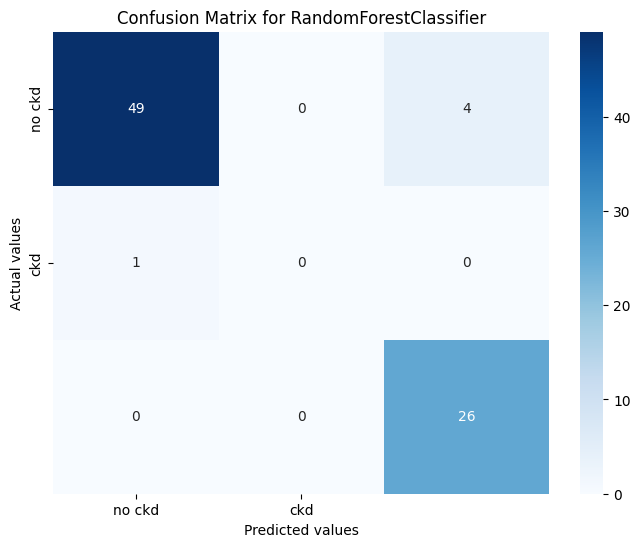

In [59]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap='Blues', annot=True, xticklabels=['no ckd','ckd'], yticklabels=['no ckd', 'ckd'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()


In [60]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm

array([[49,  0,  4],
       [ 1,  0,  0],
       [ 0,  0, 26]])

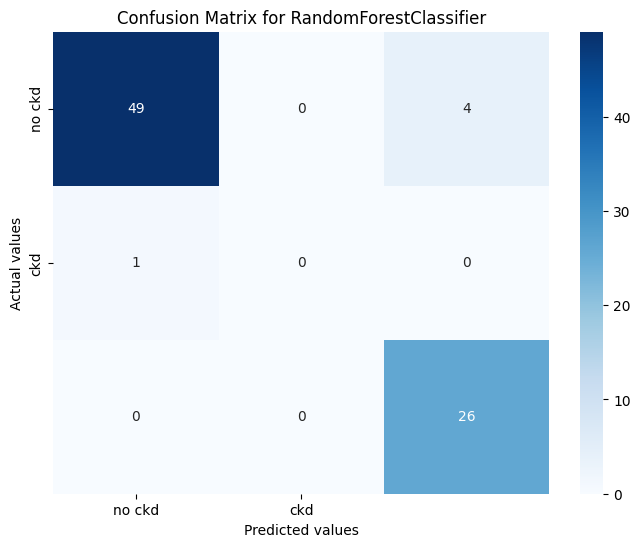

In [61]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap='Blues', annot=True, xticklabels=['no ckd','ckd'], yticklabels=['no ckd', 'ckd'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()


In [62]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.96      0.95        53
           1       0.00      0.00      0.00         1
           2       0.92      0.92      0.92        26

    accuracy                           0.94        80
   macro avg       0.62      0.63      0.63        80
weighted avg       0.93      0.94      0.93        80



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm

array([[49,  0,  4],
       [ 1,  0,  0],
       [ 0,  0, 26]])

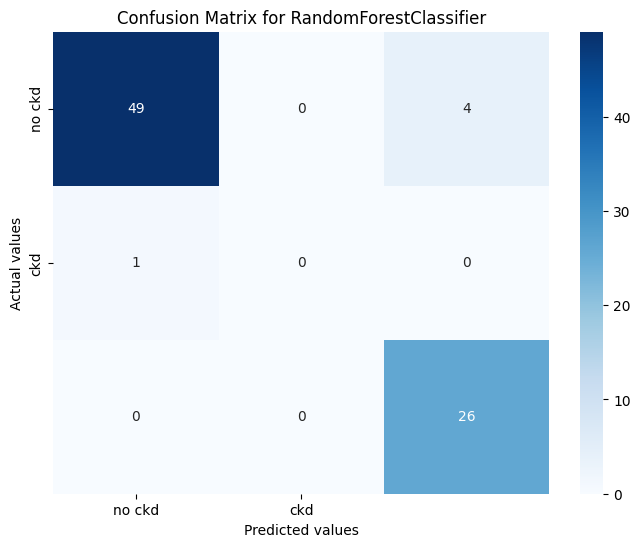

In [64]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap='Blues', annot=True, xticklabels=['no ckd','ckd'], yticklabels=['no ckd', 'ckd'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()


In [65]:
bootstraps=[]
for model in list(set(final.model.values)):
    model_df = final.loc[final.model == model]
    bootstrap = model_df.sample(n=30, replace=True)
    bootstraps.append(bootstrap)

bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics',value_name='values')
time_metrics = ['fit_time','score_time']
    

In [66]:
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)]
results_long_nofit = results_long_nofit.sort_values(by='values')

In [67]:
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)]
results_long_fit = results_long_fit.sort_values(by='values')

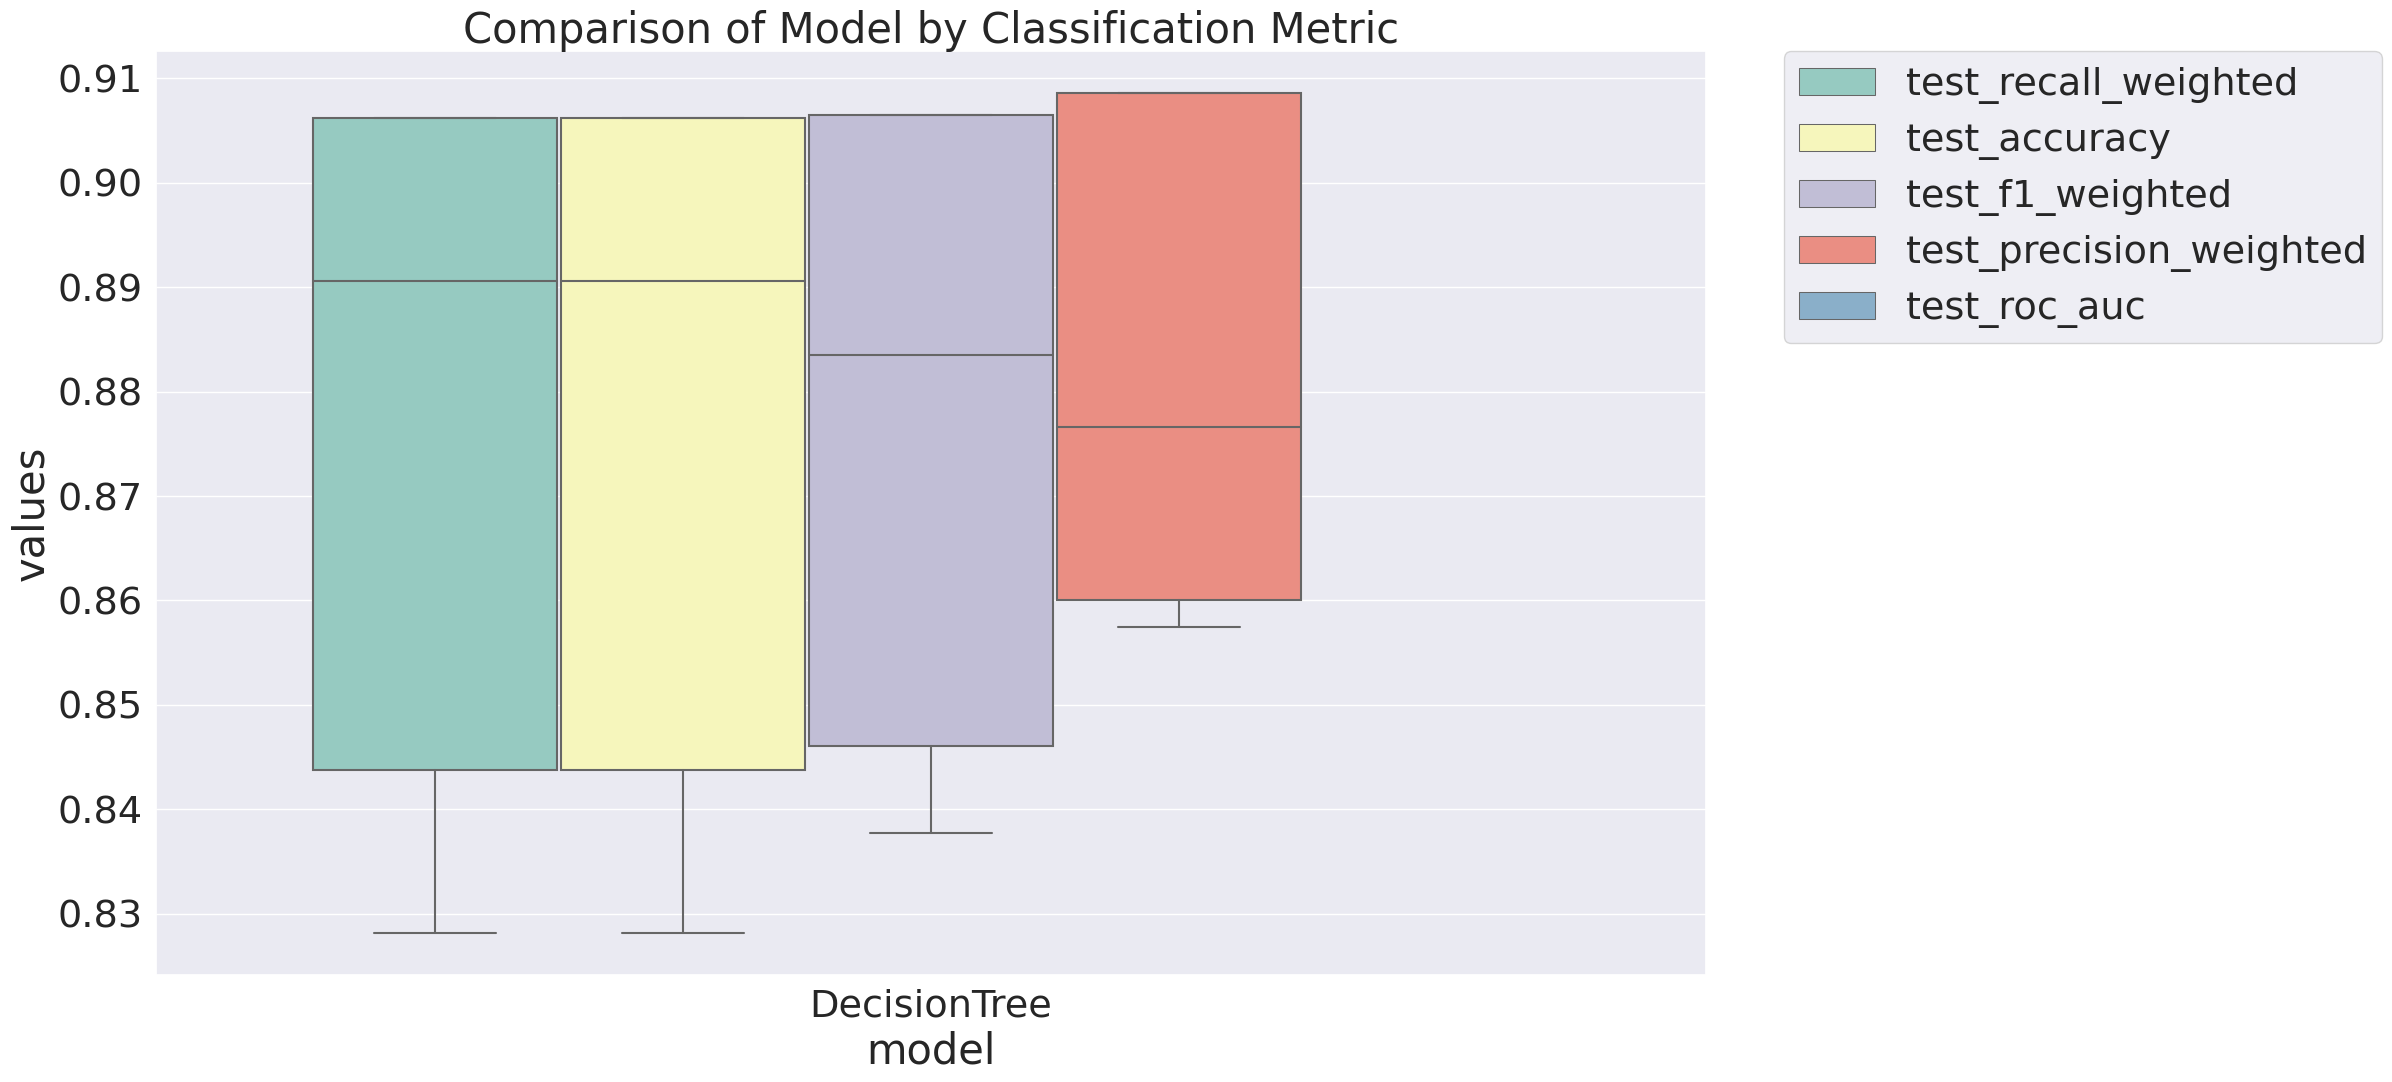

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g=sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
plt.title('Comparison of Model by Classification Metric')
plt.savefig('./benchmark_models_performance.png',dpi=300)

In [69]:
# task 6

In [70]:
pickle.dump(lgr, open('ckd.pkl','wb'))

In [71]:
from flask import Flask, render_template, request
import numpy as np
import pickle

In [72]:
app = Flask('_name_')
model = pickle.load(open('ckd.pkl', 'rb'))


In [73]:
@app.route('/')
def home():
    return render_template('home.html')

In [74]:
@app.route('/prediction',methods=['POST', 'GET'])

def prediction():
    return render_template('indexnew.html')
@app.route('/Home',methods=['POST','GET'])
def my_home():
    return render_template('home.html')

@app.route('/predict',methods=['POST'])
def predict():
    input_features=[float(x) for x in request.form.values()]
    features_values=[np.array(input_features)]

    features_name=['blood_urea','blood glucose random', 'anemia',
                   'coronary_artery_disease', 'pus_cell', 'red_blood_cells',
                   'diabetesmellitus', 'pedal_edema']
    df=pd.DataFrame(features_value, columns=fetures_name)
    output=model.predict(df)    